<a href="https://colab.research.google.com/github/Soumya169/Deep_Learning_Projects/blob/main/catvsdog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tongpython/cat-and-dog")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'cat-and-dog' dataset.
Path to dataset files: /kaggle/input/cat-and-dog


In [31]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense , Conv2D , MaxPooling2D  ,Flatten , BatchNormalization , Dropout

In [32]:
#generators

train_ds = keras.utils.image_dataset_from_directory(
     directory = '/kaggle/input/cat-and-dog/training_set/training_set',
     labels =  'inferred',
     label_mode = 'int',
     batch_size =32,
     image_size=(256 ,256)
)
#generators

validation_ds = keras.utils.image_dataset_from_directory(
     directory ='/kaggle/input/cat-and-dog/test_set/test_set',
     labels =  'inferred',
     label_mode = 'int',
     batch_size =32,
     image_size=(256 ,256)
)

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [52]:
#Normalize
def process(image , label):
  image = tf.cast(image/255 , tf.float32)
  return image , label
train_ds =train_ds.map(process)
validation_ds =validation_ds.map(process)

In [53]:
#CNN Model

model =Sequential()
model.add(Conv2D(32,kernel_size=(3,3) , padding ='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2) , strides =2 , padding ='valid'))

model.add(Conv2D(64,kernel_size=(3,3) , padding ='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2) , strides =2 , padding ='valid'))

model.add(Conv2D(128,kernel_size=(3,3) , padding ='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2) , strides =2 , padding ='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64 , activation ='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [55]:
model.compile(optimizer ='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

In [56]:
history = model.fit(train_ds , epochs=10 , validation_data=validation_ds)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 42s 143ms/step - accuracy: 0.5577 - loss: 2.5018 - val_accuracy: 0.4997 - val_loss: 0.7004
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 32s 126ms/step - accuracy: 0.6252 - loss: 0.6493 - val_accuracy: 0.4997 - val_loss: 0.8303
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 40s 158ms/step - accuracy: 0.6563 - loss: 0.6197 - val_accuracy: 0.4997 - val_loss: 1.6969
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 32s 126ms/step - accuracy: 0.7018 - loss: 0.5517 - val_accuracy: 0.4997 - val_loss: 1.5396
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 32s 127ms/step - accuracy: 0.7705 - loss: 0.4722 - val_accuracy: 0.5003 - val_loss: 1.2131
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 40s 159ms/step - accuracy: 0.8018 - loss: 0.4029 - val_accuracy: 0.4997 - val_loss: 1.5913
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 32s 127ms/step - accuracy: 0.8354 - loss: 0.3388 - val_accuracy: 0.4997 - val_loss: 5.7954
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 32s 127ms/step - accuracy: 0.8792 - loss: 0

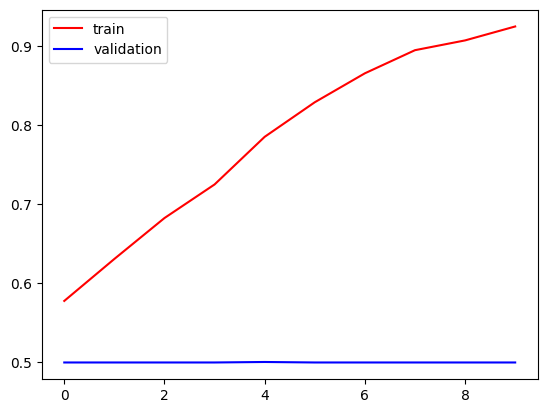

In [57]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'] , color='red' , label='train')
plt.plot(history.history['val_accuracy'] , color='blue' , label='validation')
plt.legend()
plt.show()

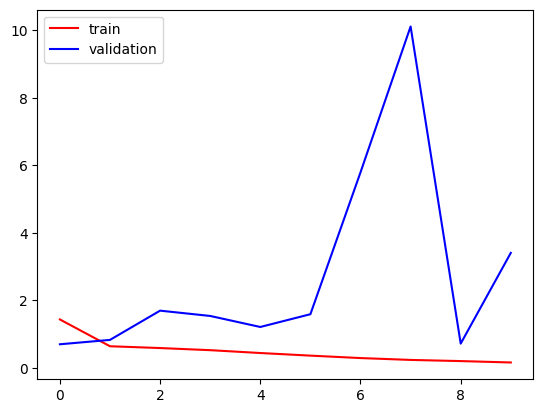

In [58]:
plt.plot(history.history['loss'] , color='red' , label='train')
plt.plot(history.history['val_loss'] , color='blue' , label='validation')
plt.legend()
plt.show()

In [41]:
import cv2

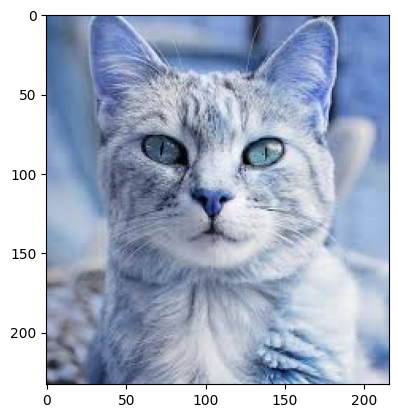

In [69]:
test_img =cv2.imread('/content/cimages.jpg')
plt.imshow(test_img)

In [65]:
test_img.shape

(233, 216, 3)

In [66]:
test_img=cv2.resize(test_img,(256,256))

In [67]:
test_input = test_img.reshape((1,256,256,3))

In [68]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[0.]], dtype=float32)

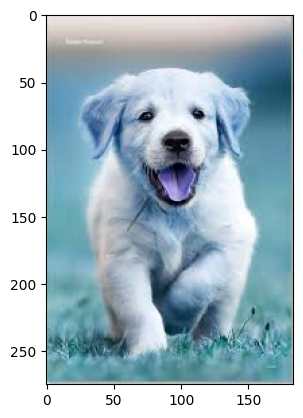

In [70]:
test_img =cv2.imread('/content/dimages.jpg')
plt.imshow(test_img)

In [71]:
test_img.shape

(275, 184, 3)

In [72]:
test_img=cv2.resize(test_img,(256,256))

In [73]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[0.]], dtype=float32)